In [8]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import tables
from phd.utils.path_tools import find_by_meta, get_attrs_values
from scipy.optimize import curve_fit

# Востановление точек с графика из статьи 2003 года

In [9]:
path = "/mnt/storage2/phd/data/thunderstorm/Graph/Dwyer2003.dat"

In [10]:
with open(path) as fin:
    text = fin.read()
    text = text.replace(",", ".")
    text = text.split("\n")
    data = [[float(i) for i in line.split()] for line in text[:-1]]

In [11]:
data = np.array(data)
print(data)

[[  18.3872224  2559.54804209]
 [  19.51293423 2453.14818009]
 [  20.40221967 2357.30550285]
 [  22.97684119 2197.98171468]
 [  25.11886432 2059.77229602]
 [  27.4605782  1953.64843885]
 [  30.46989571 1794.18664827]
 [  36.96084874 1582.07693635]
 [  43.52208346 1433.86234259]
 [  54.38559334 1275.50457133]
 [  66.95861341 1138.39917199]
 [  87.48538027  991.15059514]
 [ 119.51415764  855.0112127 ]
 [ 153.84974267  761.10056926]
 [ 216.51294682  646.62756598]
 [ 328.19278725  554.23494911]
 [ 428.80324625  481.85268242]
 [ 543.85593337  441.2799724 ]
 [ 679.60734588  411.26444713]
 [ 824.38300922  391.66810419]
 [ 901.23637005  381.80093152]
 [ 970.72625087  382.49094359]]


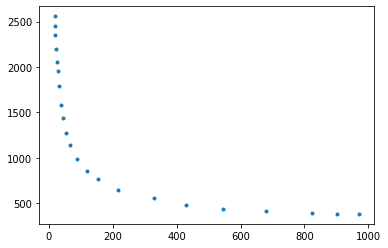

In [12]:
plt.plot(data[:,0], data[:,1], ".")

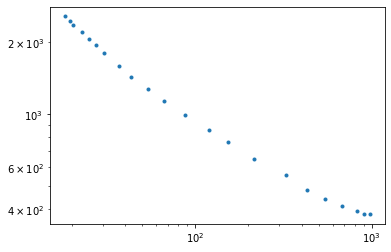

In [13]:
plt.plot(data[:,0], data[:,1], ".")
plt.xscale("log")
plt.yscale("log")

In [14]:
def power(x, alpha, const, back):
    return const*np.exp(-x/alpha) + back

In [15]:
popt, _ = curve_fit(power, xdata=np.log(data[:,0]), ydata=np.log(data[:, 1]), p0=[100, 2000, 500])


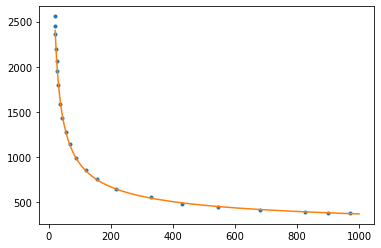

In [16]:
x = np.linspace(20,1000, 300)
plt.plot(data[:,0], data[:,1], ".")
plt.plot(x, np.exp(power(np.log(x), *popt)))

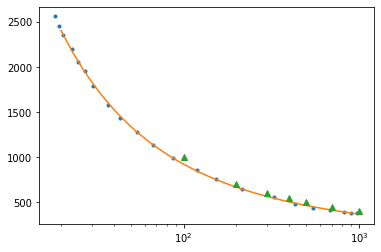

In [20]:
x = np.linspace(20,1000, 300)
plt.plot(data[:,0], data[:,1], ".")
plt.plot(x, np.exp(power(np.log(x), *popt)))
plt.plot([100, 200, 300, 400, 500, 700, 1000], [1000, 700, 600, 550, 500, 450, 400], "^")
plt.xscale("log")

In [17]:
popt

array([4.80204901, 6.2734154 , 4.42237305])

In [18]:
x = np.arange(100, 1001, 100)
y  = np.exp(power(np.log(x), *popt))

In [19]:
for i,j in zip(x,y):
    print(i,j)

100 922.2532176343615
200 667.5657452723829
300 564.0365912304808
400 504.66500585931783
500 465.02736610976814
600 436.1676662378479
700 413.9406269581483
800 396.13383378458605
900 381.4460593194639
1000 369.05588329907397


In [29]:
for i,j in zip([100, 200, 300, 400, 500, 700, 1000], [1000, 700, 600, 550, 500, 450, 400]):
    print(i,j)

100 1000
200 700
300 600
400 550
500 500
700 450
1000 400


# Анализ


In [4]:
path = "/mnt/storage2/phd/data/thunderstorm/dwyer2003/test_dwayer2003.hdf5"

In [3]:
get_attrs_values(path, "values_time")

{2.326911404999919, 2.330170093999186, 2.330975370001397, 3815.2808174750007}

In [4]:
get_attrs_values(path, "values_macros_number")

{10}

In [60]:
path = "/home/zelenyy/data/thunderstorm/dwyer2003_1/result.hdf5"

In [61]:
get_attrs_values(path, "values_time")

{47.36234086700006,
 68.1208944480004,
 158.55502878700008,
 172.12881110700073,
 198.25298637699962,
 1488.6033761829995}

In [79]:
path = "/home/zelenyy/data/thunderstorm/dwyer2003_2/result.hdf5"

In [80]:
get_attrs_values(path, "values_time")

{27.67220319400076,
 156.48066323799867,
 185.26426792299935,
 897.2626136620001,
 950.5012914020008,
 1582.193238625001}

In [81]:
path = "/home/zelenyy/data/thunderstorm/dwyer2003_3/result.hdf5"
get_attrs_values(path, "values_time")

{266.2799593569998,
 367.56528600800084,
 824.0898411819999,
 1022.512588653999,
 1574.4487730950004,
 1813.874107482001}

In [3]:
path = "/home/zelenyy/data/thunderstorm/dwyer2003_4/result.hdf5"
get_attrs_values(path, "values_time")

{88.2139523650003,
 306.4020470610012,
 390.08513133700035,
 413.53866301000016,
 1176.704341841003,
 3495.424878173999}

In [20]:
path = "/home/zelenyy/data/thunderstorm/dwyer2003_5/result.hdf5"
get_attrs_values(path, "values_time")

{35.033689302999846,
 47.842172300999664,
 168.86897971200233,
 769.7752694509982,
 1418.394525173997,
 1984.9820646059998}

In [75]:
def process(path, target_node="gamma"):
    field = []
    length = []
    number = []
    # plt.figure(figsize=(10,10))
    first = True
    with tables.open_file(path) as h5file:
        for i, group in enumerate(h5file.root):
            table = h5file.get_node(group, target_node)
            if first:
                first = False
                print("Primry particle: {}".format(table.attrs["values_macros_particle"]))
            
            field.append(table.attrs["values_gdml_fieldValueZ"]*1e3/1e-1)
            length.append(table.attrs["values_gdml_cellHeight"])
            number.append(table.nrows/table.attrs["values_macros_number"])
    # plt.plot(field, number, "*")
    print(max(number))
    plt.plot(length, number, "*")

Primry particle: e-
1697.0


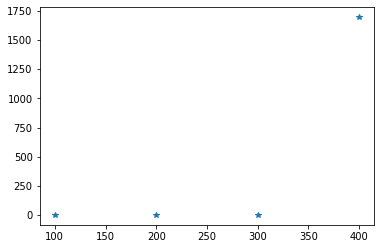

In [76]:
process(path)

Primry particle: e-
1729.8


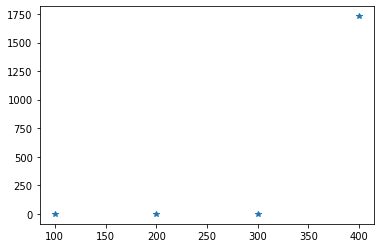

In [77]:
process(path, target_node="positron")

In [5]:
def polar(path, target_node="gamma", cellHeight = 400):
    paths = find_by_meta(path,target_node=target_node, values_gdml_cellHeight=cellHeight)
    plt.figure(figsize=(10,10))
    with tables.open_file(path) as h5file:
        for i, path in enumerate(paths):
            table = h5file.get_node(path)
            data = table.read()
            
            indx = data["energy"] < 1
            ax = plt.subplot(221, projection='polar')
            ax.plot(data["theta"][indx], data["energy"][indx], ".")
            ax.set_theta_zero_location("N")  # theta=0 at the top
            ax.set_theta_direction(-1) 
            
            indx = np.logical_and(data["energy"] > 1, data["energy"] < 10)
            ax = plt.subplot(222, projection='polar')
            ax.plot(data["theta"][indx], data["energy"][indx], ".")
            ax.set_theta_zero_location("N")  # theta=0 at the top
            ax.set_theta_direction(-1) 
            
            indx = data["energy"] > 10
            ax = plt.subplot(223, projection='polar')
            ax.plot(data["theta"][indx], data["energy"][indx], ".")
            ax.set_theta_zero_location("N")  # theta=0 at the top
            ax.set_theta_direction(-1) 

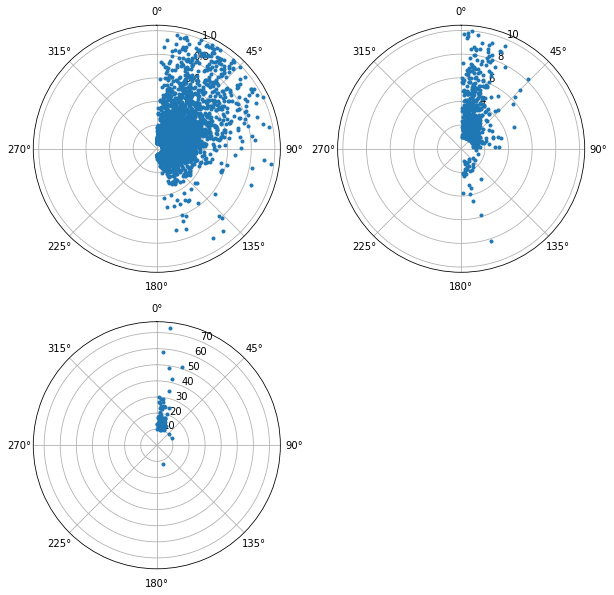

In [6]:
polar(path)

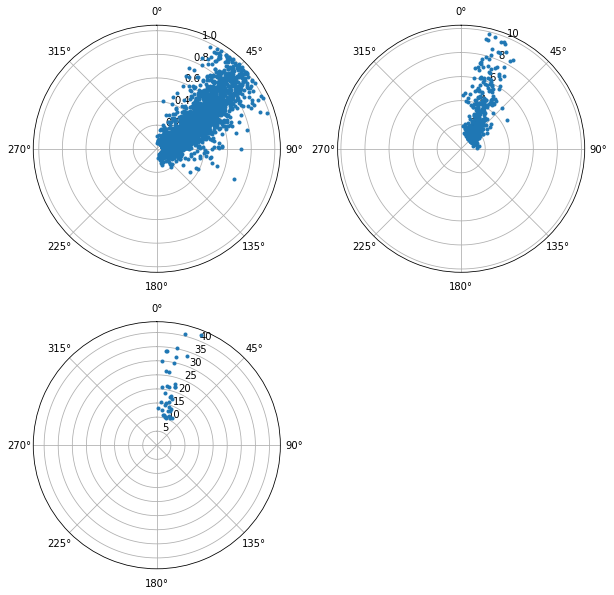

In [98]:
polar(path, target_node="positron")

In [11]:
def theta_to_direction(theta):
    x = np.round(np.sin(theta), 3)
    y = 0
    z = np.round(np.cos(theta), 3)
    return f"{x} {y} {z}"

In [12]:
theta_to_direction(np.pi/6)

'0.5 0 0.866'

## Обработка дерева

In [37]:
data = np.load("/mnt/storage2/phd/data/thunderstorm/tree_1/tree_socket2.npy")


(array([1.9820e+03, 4.7300e+03, 2.1546e+04, 5.8854e+04, 6.9060e+03,
        3.3100e+02, 1.7000e+01, 8.0000e+00, 1.1000e+01, 6.0000e+00]),
 array([-299.89083958, -243.65083753, -187.41083548, -131.17083343,
         -74.93083137,  -18.69082932,   37.54917273,   93.78917479,
         150.02917684,  206.26917889,  262.50918095]),
 <a list of 10 Patch objects>)

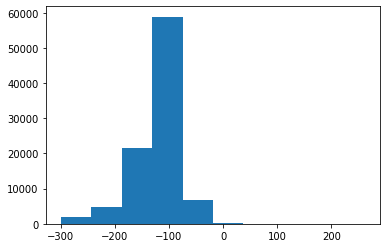

In [28]:
plt.hist(data["z"])

In [29]:
np.max(data["z"])

262.50918094663945

In [30]:
data.size


94391

In [31]:
# 11 - электрон
# -11 - позитрон 
# 22 - гамма
np.unique(data["particle"], return_counts=True)

(array([-11,  11,  22], dtype=int32), array([   49, 88293,  6049]))

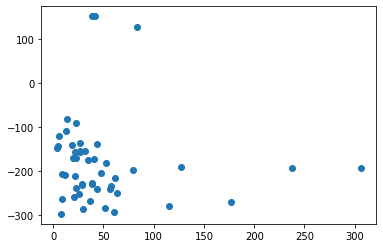

In [32]:
indx =  data["particle"] == -11
plt.scatter(data[indx]["radius"], data[indx]["z"])

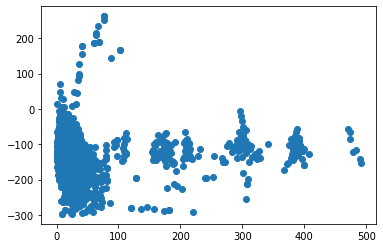

In [33]:
indx =  data["particle"] == 22
plt.scatter(data[indx]["radius"], data[indx]["z"])

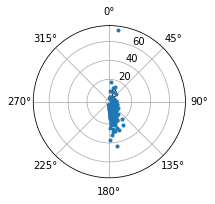

In [34]:
indx =  data["particle"] == 22
ax = plt.subplot(121, projection='polar')
ax.plot(data["theta"][indx], data["energy"][indx], ".")
ax.set_theta_zero_location("N")  # theta=0 at the top
ax.set_theta_direction(-1) 

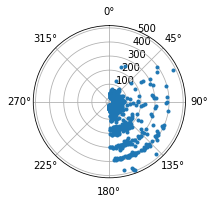

In [35]:
indx =  data["particle"] == 22
ax = plt.subplot(121, projection='polar')
ax.plot(data["theta"][indx], data["radius"][indx], ".")
ax.set_theta_zero_location("N")  # theta=0 at the top
ax.set_theta_direction(-1) 

In [21]:
TREE_DTYPE = np.dtype([
    ("id", "i"),
    ("parent_id", "i"),
    ("energy", "d"),
    ("theta", "d"),
    ("radius", "d"),
    ("z", "d"),
])

In [22]:
path_gamma = "/mnt/storage2/phd/data/thunderstorm/tree_1/gamma.bin"

In [24]:
data_gamma = np.fromfile(path_gamma, TREE_DTYPE)

In [25]:
data_gamma.size

260

In [87]:
path_pos = "/mnt/storage2/phd/data/thunderstorm/tree_1/positron.bin"
data_pos = np.fromfile(path_pos, TREE_DTYPE)
data_pos.size

115

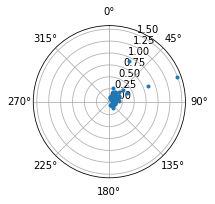

In [82]:
indx =  np.logical_and(data_gamma["energy"] < 5, data_gamma["z"]<100)
ax = plt.subplot(121, projection='polar')
ax.plot(data_gamma["theta"][indx], data_gamma["energy"][indx], ".")
ax.set_theta_zero_location("N")  # theta=0 at the top
ax.set_theta_direction(-1) 

In [84]:
(data_gamma["z"]<100).sum()

179

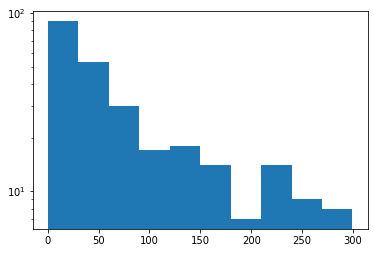

In [90]:
plt.hist(data_gamma["z"])
plt.yscale("log")

(array([41., 25., 24., 17., 19., 17., 11.,  6., 12.,  7.]),
 array([  0,  10,  20,  30,  40,  50,  60,  70,  80,  90, 100]),
 <a list of 10 Patch objects>)

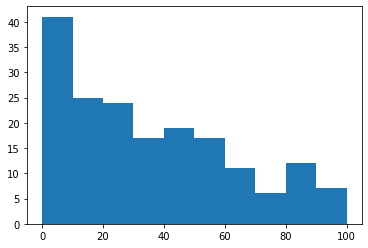

In [85]:
plt.hist(data_gamma["z"], bins=np.arange(0,101,10))

(array([2., 5., 3., 2., 3., 5., 3., 3., 5., 1.]),
 array([  0,  10,  20,  30,  40,  50,  60,  70,  80,  90, 100]),
 <a list of 10 Patch objects>)

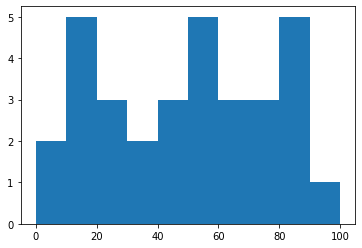

In [88]:
plt.hist(data_pos["z"], bins=np.arange(0,101,10))

In [63]:
res = []
for item in data_gamma:
    indx = np.where(data["id"] == item["parent_id"])[0]
    res.append(data[indx]["z"])

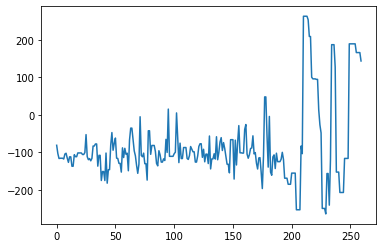

In [64]:
plt.plot(res)

In [51]:
def find_chain(data, parent_final):
    result = []
    parent_indx = np.where(data["id"] == parent_final)[0][0]
    parent_id = data[parent_indx]["parent_id"]
    result.append(parent_final)
    if parent_id == 0:
        return [1]
    result += find_chain(data, parent_id) 
    return result

In [52]:
chain = find_chain(data, data_gamma["parent_id"][0])

In [42]:
np.where(data["id"] == data_gamma["parent_id"][0])

(array([73203]),)

In [53]:
chain

[4493483, 4488410, 4462373, 4441829, 4432894, 3954384, 3101967, 243, 1]

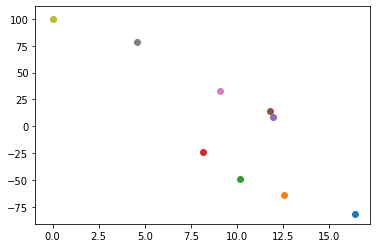

In [59]:
for c in chain:
    item = data[data["id"] == c]
    plt.scatter(item["radius"],item["z"])
#     print(["particle"])

In [65]:
chains = []
for item in data_gamma:
    chains.append(find_chain(data, item["parent_id"]))

In [66]:
max(map(len, chains))

17

In [67]:
flat_chains = []
for c in chains:
    flat_chains += c

In [68]:
chain_particles = []
for c in flat_chains:
    item = data[data["id"] == c]
    chain_particles.append(item)

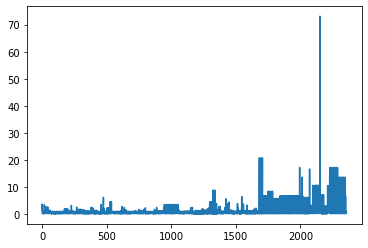

In [70]:
energy = []
for it in chain_particles:
    energy.append(it["energy"])
plt.plot(energy)

In [73]:
min_ = min(energy)
for ch in chains:
    for c in ch:
        item = data[data["id"] == c]
        if (item["energy"] == min_ ):
            print(ch)

[986626, 958157, 946608, 845078, 607520, 784, 1]


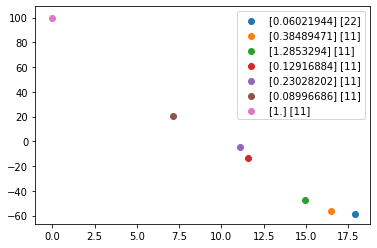

In [77]:
chain_1 = [986626, 958157, 946608, 845078, 607520, 784, 1]
for c in chain_1:
    item = data[data["id"] == c]
    plt.scatter(item["radius"],item["z"], label="{} {}".format(item["energy"], item["particle"]))
plt.legend()

In [78]:
data_gamma[data_gamma["parent_id"] == 986626]

array([(4909288, 986626, 0.05190866, 1.52106943, 112.10775269, 25.15596539)],
      dtype=[('id', '<i4'), ('parent_id', '<i4'), ('energy', '<f8'), ('theta', '<f8'), ('radius', '<f8'), ('z', '<f8')])